In [28]:
temp[-1]

4.0

In [79]:
data = []
f = open("data/input002.txt", "r")
for x in f:
    data.append(x)

In [80]:
begin = data[0][:-1]
end = data[1][:-1]
pred_n = int(data[2][:-1])
temp = [float(x[:-1]) for x in data[3:-1]]

In [81]:
begin,end,pred_n

('2014-05-03', '2014-09-10', 3144)

In [82]:
data[-1]

'48'

In [83]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [84]:
import statsmodels.api as sm

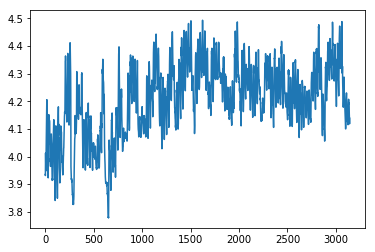

In [85]:
plt.plot(np.log(temp))

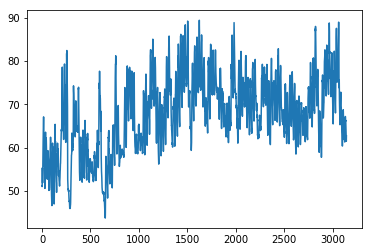

In [86]:
plt.plot(temp)

In [87]:
b_y,b_m,b_d =  [int(x) for x in begin.split('-')]
e_y,e_m,e_d =  [int(x) for x in end.split('-')]

In [88]:
import datetime

dt = datetime.datetime(b_y, b_m, b_d)
end = datetime.datetime(e_y, e_m, e_d, 23, 59, 59)
step = datetime.timedelta(hours=1)

time = []

while dt < end:
    time.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step

In [89]:
len(time)

3144

In [90]:
df = pd.DataFrame([time,temp]).transpose()
df.columns = ['time','temp']
df = df.set_index('time')
df.head()

,temp
time,
2014-05-03 00:00:00,51.15
2014-05-03 01:00:00,50.96
2014-05-03 02:00:00,54.54
2014-05-03 03:00:00,55.28
2014-05-03 04:00:00,54.27


In [91]:
temp_np = np.array(df['temp'],dtype='float')
temp_np_diff = np.array(df['temp'].diff().dropna(),dtype='float')
len(temp_np)

3144

In [217]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
model=sm.tsa.statespace.SARIMAX(endog=temp_np,order=(3,2,4),seasonal_order=(0,0,1,24),trend='t',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                 3144
Model:             SARIMAX(3, 2, 4)x(0, 0, 1, 24)   Log Likelihood               -5398.609
Date:                            Fri, 05 Jul 2019   AIC                          10817.219
Time:                                    17:23:29   BIC                          10877.745
Sample:                                         0   HQIC                         10838.939
                                           - 3144                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift       6.576e-08   5.61e-06      0.012      0.991   -1.09e-05    1.11e-05
ar.L1         -0.2272      1.603   

In [201]:
model=sm.tsa.statespace.SARIMAX(endog=temp_np,order=(2,1,3),seasonal_order=(0,0,0,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   24
Model:               SARIMAX(2, 1, 3)   Log Likelihood                 -15.391
Date:                Fri, 05 Jul 2019   AIC                             44.783
Time:                        23:13:54   BIC                             52.731
Sample:                             0   HQIC                            46.782
                                 - 24                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1073      0.225     -0.477      0.633      -0.548       0.334
ar.L1         -0.0795      0.283     -0.281      0.779      -0.634       0.475
ar.L2          0.9065      0.239      3.798      0.0

In [188]:
model=sm.tsa.statespace.SARIMAX(endog=temp_np,order=(4,1,3),seasonal_order=(2,0,2,12),trend='c',enforce_invertibility=False)
results=model.fit()
print(results.summary())

ValueError: maxlag should be < nobs

In [202]:
res = results.forecast(1*24)
#res = np.exp(res)

In [203]:
res

array([21.0991456 , 19.98107966, 18.62213271, 17.60923395, 16.35046796,
       15.42494511, 14.25005247, 13.39707313, 12.29244926, 11.49964858,
       10.45394309,  9.71101397,  8.71475653,  8.01310786,  7.05839604,
        6.39086775,  5.47110677,  4.83173209,  3.94141775,  3.32522506,
        2.45976275,  1.86261024,  1.01816394,  0.4366018 ])

In [204]:
np.array(output)

array([36.02, 36.1 , 36.98, 37.01, 36.75, 36.01, 35.66, 34.72, 33.9 ,
       32.62, 31.51, 30.73, 29.5 , 26.94, 25.47, 23.84, 22.55, 21.03,
       19.92, 18.77, 18.48, 18.07, 17.91, 17.11])

In [92]:
output = []
f = open("data/output002.txt", "r")
for x in f:
    output.append(float(x.strip()))

In [64]:
count = 0
for i in range(len(res)):
    if abs(res[i]-output[i]) <= 5:
        count += 1
count/len(res)

NameError: name 'res' is not defined

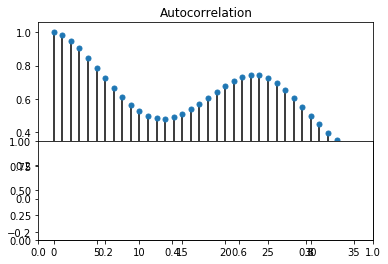

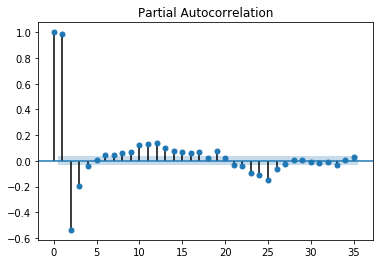

In [76]:
#fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(temp_np)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(temp_np)
plt.show()

In [96]:
temp_np_diff = np.array(df['temp'].diff().diff().dropna(),dtype='f')

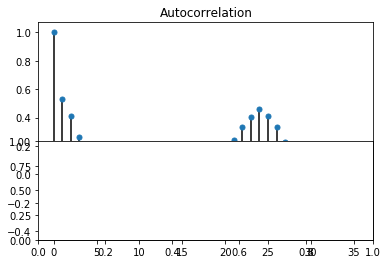

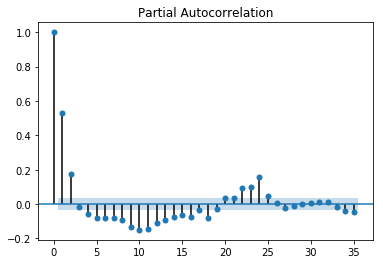

In [195]:
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(temp_np_diff)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(temp_np_diff)
plt.show()

In [349]:
fit1 = SimpleExpSmoothing(temp_np).fit(smoothing_level=0.2,optimized=False)

In [352]:
fit2 = SimpleExpSmoothing(temp_np).fit(smoothing_level=0.6,optimized=False)
res = fit2.forecast(1152)

In [354]:
fit3 = SimpleExpSmoothing(temp_np).fit()
res = fit3.forecast(1152)

In [393]:
fit1 = ExponentialSmoothing(temp_np, seasonal_periods=6, trend='add', seasonal='add').fit(use_boxcox=True)
res = fit1.forecast(1152)

/Users/hongdouli/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [273]:
fit2 = ExponentialSmoothing(temp_np, seasonal_periods=12, trend='add', seasonal='mul').fit(use_boxcox=True)
res = fit2.forecast(1152)

/Users/hongdouli/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [94]:
fit3 = Holt(temp_np, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.3)
res = fit3.forecast(24*48)

In [74]:
fit3 = ExponentialSmoothing(temp_np, seasonal_periods=12, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
res = fit3.forecast(24)
#res = np.exp(res)
#res[np.isnan(res)] = np.mean(temp_np)

/Users/hongdouli/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [77]:
res

array([ 21.02902524,  19.54577063,  18.06251602,  16.5792614 ,
        15.09600679,  13.61275218,  12.12949757,  10.64624296,
         9.16298834,   7.67973373,   6.19647912,   4.71322451,
         3.2299699 ,   1.74671528,   0.26346067,  -1.21979394,
        -2.70304855,  -4.18630317,  -5.66955778,  -7.15281239,
        -8.636067  , -10.11932161, -11.60257623, -13.08583084])

In [95]:
def fill_zeros_with_last(arr):
    prev = np.arange(len(arr))
    prev[arr == np.mean(temp_np)] = 0
    prev = np.maximum.accumulate(prev)
    arr[np.isnan(arr)] = np.mean(temp_np)
    return arr[prev]
res = fill_zeros_with_last(res)

In [237]:
fit4 = ExponentialSmoothing(temp_np, seasonal_periods=12, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
res = fit4.forecast(1152)

/Users/hongdouli/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


AttributeError: 'numpy.ndarray' object has no attribute 'fillna'

In [48]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = ExponentialSmoothing(temp_np,seasonal_periods=24 ,trend='add', seasonal='add',).fit()

NameError: name 'temp_np' is not defined

In [350]:
res = fit1.forecast(1152)

In [140]:
res[0] = temp_np[-1] + res[0]

In [141]:
for i in range(1,len(res)):
    res[i] = res[i] + res[i-1]

In [157]:
len(np.array(res))

1152

In [96]:
count = 0
for i in range(len(res)):
    if abs(res[i]-output[i]) < 5:
        count += 1
count/len(res)

0.40625

In [72]:
'\n'.join(map(str,res))

'32.967083333333335\n32.967083333333335\n32.967083333333335\n32.967083333333335\n32.967083333333335\n32.967083333333335\n32.967083333333335\n32.967083333333335\n32.967083333333335\n26.914859953871883\n27.09857795262381\n25.268063710035467\n32.967083333333335\n32.967083333333335\n32.967083333333335\n32.967083333333335\n32.967083333333335\n32.967083333333335\n32.967083333333335\n32.967083333333335\n32.967083333333335\n26.920784696110985\n27.101878175470958\n25.27091351902861'

In [419]:
res, output

(array([63.413639  , 63.48346457, 62.37930603, ..., 59.96005721,
        61.01826252, 62.53281874]),
 [62.65,
  62.24,
  61.31,
  61.18,
  60.48,
  60.78,
  60.18,
  60.13,
  60.88,
  61.94,
  63.59,
  65.7,
  67.52,
  67.31,
  67.16,
  67.31,
  66.37,
  65.8,
  65.28,
  63.77,
  63.39,
  63.11,
  62.79,
  62.09,
  62.86,
  62.92,
  63.06,
  63.16,
  63.79,
  63.32,
  63.87,
  64.18,
  64.75,
  67.56,
  68.77,
  69.98,
  71.63,
  73.17,
  74.58,
  75.88,
  78.2,
  77.05,
  76.58,
  75.83,
  74.6,
  73.6,
  72.59,
  71.46,
  68.72,
  66.47,
  64.37,
  63.2,
  62.53,
  61.9,
  60.4,
  60.17,
  61.63,
  62.92,
  62.49,
  64.17,
  64.55,
  65.72,
  63.86,
  64.14,
  64.83,
  64.74,
  63.95,
  62.43,
  61.58,
  61.17,
  59.32,
  58.23,
  56.45,
  55.61,
  56.17,
  55.67,
  54.56,
  53.47,
  53.6,
  53.27,
  55.42,
  59.13,
  62.25,
  63.38,
  63.96,
  64.16,
  63.65,
  63.39,
  62.44,
  61.83,
  61.14,
  59.6,
  59.57,
  60.21,
  60.39,
  60.32,
  59.14,
  58.03,
  58.27,
  57.14,
  56.04,


In [427]:
df = df.reset_index()

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3144 entries, 0 to 3143
Data columns (total 2 columns):
time    3144 non-null datetime64[ns]
temp    3144 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 49.2+ KB


In [436]:
df.time = pd.to_datetime(df.time)

In [469]:
df['hour'] = df.time.dt.hour
df['hour2'] = df['hour']*df['hour']

In [439]:
df['month'] = df.time.dt.month

In [442]:
df['day'] = df.time.dt.dayofyear

In [501]:
df['temp'] = pd.to_numeric(df['temp'])

In [502]:
import statsmodels.api as sm
from patsy import dmatrices
y, X = dmatrices('temp ~ hour2 + hour + month + day', data=df, return_type='dataframe')

In [503]:
y[:3]

,temp
0,51.15
1,50.96
2,54.54


In [504]:
mod = sm.OLS(y, X) 

In [505]:
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     463.5
Date:                Fri, 05 Jul 2019   Prob (F-statistic):          2.56e-314
Time:                        22:05:05   Log-Likelihood:                -10520.
No. Observations:                3144   AIC:                         2.105e+04
Df Residuals:                    3139   BIC:                         2.108e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.7261      0.749     49.043      0.000      35.258      38.194
hour2         -0.0388      0.003    -13.536      0.000      -0.044      -0.033
hour           1.2215      0.068     17.882      0.000       1.088       1.355
month          3.8189      0.424      9.012      0.000       2.988       4.650
day           -0.0090      0.014     -0.638      0.524      -0.037       0.019
==============================================================================
Omnibus:                       58.344   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.610
Skew:                           0.175   Prob(JB):                     9.21e-10
Kurtosis:                       2.558   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [477]:
import statsmodels.formula.api as sm
model = sm.ols(formula = 'temp ~ hour2 + hour + month + day', data = df).fit()

In [475]:
model.summary()

ValueError: shapes (3144,2005) and (3144,2005) not aligned: 2005 (dim 1) != 3144 (dim 0)

In [448]:
dt = datetime.datetime(2014, 9, 11)
#end = datetime.datetime(2014, 9, 10, 23, 59, 59)
step = datetime.timedelta(hours=1)
count = 0

time = []

while count < 1152:
    time.append(dt.strftime('%Y-%m-%d %H:%M:%S'))
    dt += step
    count += 1

In [508]:
df2 = pd.DataFrame(time)
df2.columns = ['time']
df2.time = pd.to_datetime(df2.time)
df2['hour'] = df2.time.dt.hour
df2['hour2'] = df2['hour']*df2['hour']
df2['month'] = df2.time.dt.month
df2['day'] = df2.time.dt.dayofyear
df2['constant'] = 1

In [511]:
result = res.predict(df2[['constant','hour2','hour','month','day']])

In [512]:
count = 0
for i in range(len(result)):
    if abs(result[i]-output[i]) < 5:
        count += 1
count/len(result)

0.04513888888888889

In [44]:
import pandas as pd
reviews_data = pd.read_csv('data/reviews_data.csv')

In [46]:
reviews_data = reviews_data.dropna()

In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [7]:
! pip3 install vaderSentiment

In [8]:
import spacy
from spacy.lemmatizer import Lemmatizer

In [99]:
def sentiment(text):
    text = text.lower()
    text = text.split()
    lemmatizer = Lemmatizer()
    analyser = SentimentIntensityAnalyzer()
    text = [lemmatizer.lookup(word) for word in text]
    text = ' '.join(text)
    score = analyser.polarity_scores(text)['compound']
    if score > 0: return 1
    elif score < 0: return -1
    else: return 0

In [28]:
text = 'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\r\n\r\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the calzone better. The calzone does have a sweetish sauce but that\'s how I like my sauce!\r\n\r\nWe had to box part of the pizza to take it home and we were out the door by 6:42. So, everything was great and not like these bad reviewers. That goes to show you that  you have to try these things yourself because all these bad reviewers have some serious issues.'

In [31]:
analyser = SentimentIntensityAnalyzer()
analyser.polarity_scores(text)

{'neg': 0.049, 'neu': 0.741, 'pos': 0.21, 'compound': 0.9943}

In [102]:
reviews_data['sentiment'] = reviews_data.text.apply(sentiment)

/Users/hongdouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [100]:
def sentiment2(text):
    analyser = SentimentIntensityAnalyzer()
    text = ' '.join(text)
    return analyser.polarity_scores(text)['compound']

In [115]:
reviews_data.head()

,Unnamed: 0,business_id,business_review_count,review_id,reviewer_average_stars,reviewer_review_count,reviewer_useful,text,sentiment,rating_ws
1,0.0,9yKzy9PApeiPPOUJEtnvkg,116.0,fWKvX83p0-ka4JS3dc6E5A,3.72,376.0,1034.0,My wife took me here on my birthday for breakf...,1,4.72
3,1.0,ZRJwVLyzEJq1VAihDhYiow,102.0,IjZ33sJrzXqU-0X6U8NwyA,5.00,2.0,0.0,I have no idea why some people give bad review...,1,5.00
7,3.0,_1QQZuf4zZOyFCvXc0o6Vg,88.0,G-WvGaISbqqaMHlNnByodA,4.29,31.0,75.0,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,5.00
9,4.0,6ozycU1RpktNG2-1BroVtw,5.0,1uJFq2r5QfJG_6ExMRCaGw,3.25,28.0,32.0,General Manager Scott Petello is a good egg!!!...,1,4.25
11,5.0,#NAME?,109.0,m2CKSsepBCoRYWxiRUsxAg,3.54,654.0,1584.0,"Quiessence is, simply put, beautiful. Full wi...",1,4.54


In [108]:
def add_sentiment(ave_star,sentiment):
    if sentiment> 0:
        return min(5,ave_star+1)
    elif sentiment<0:
        return max(0,ave_star-1)
    else: return ave_star

In [114]:
reviews_data['rating_ws'] = reviews_data.apply(lambda x:add_sentiment(x.reviewer_average_stars,x.sentiment), axis = 1)

/Users/hongdouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
reviews_data.reviewer_average_stars.std()

1.0566455682127545

In [121]:
def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [120]:
np.sum(reviews_data.reviewer_average_stars*reviews_data.reviewer_review_count)/np.sum(reviews_data.reviewer_review_count)

3.737930030657073

In [126]:
reviews_data['weight'] = reviews_data.reviewer_useful/reviews_data.reviewer_review_count

/Users/hongdouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
reviews_data['weight'] = (reviews_data['weight'].max() - reviews_data['weight'])/(reviews_data['weight'].max()-reviews_data['weight'].min())
reviews_data['weight'] = reviews_data['weight'].fillna(0.01)

/Users/hongdouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/hongdouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [135]:
reviews_data['rating'] = reviews_data['weight'] * reviews_data['rating_ws']

/Users/hongdouli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
reviews_data.loc[reviews_data.business_id == '0L3qEjF0jkFQkDIT4linUA']

,Unnamed: 0,business_id,business_review_count,review_id,reviewer_average_stars,reviewer_review_count,reviewer_useful,text,sentiment,rating_ws,weight,rating
6533,3266.0,0L3qEjF0jkFQkDIT4linUA,3.0,Rd1-zDT8gg2zAJzA3incYw,3.0,2.0,0.0,Absolutely awful... these guys have NO idea wh...,-1,2.0,0.0,2.0


In [138]:
reviews_data.groupby('business_id')['rating'].mean().to_frame()

,rating
business_id,
#NAME?,3.831672
-0bUDim5OGuv8R0Qqq6J4A,4.012269
-1N0Z3uM8xbxKS8XiAnaog,2.248970
-3WVw1TNQbPBzaKCaQQ1AQ,2.547113
-4A5xmN21zi_TXnUESauUQ,4.222365
-5rFC4EVrT-v8g1PSEf6Xg,4.525706
-6O53B-ksqSKzWM6Y9moEQ,3.516254
-6Roo-EHgSdUa4rP3tWyRw,3.028603
-73hx2hut_2KPcGpCTO5YA,4.855996


In [147]:
reviews_data.weight = reviews_data.weight.replace(0, 0.001)

/Users/hongdouli/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [148]:
reviews_data.groupby('business_id').apply(wavg,'rating_ws','weight')

business_id
#NAME?                    3.555787
-0bUDim5OGuv8R0Qqq6J4A    4.090000
-1N0Z3uM8xbxKS8XiAnaog    2.940000
-3WVw1TNQbPBzaKCaQQ1AQ    1.193921
-4A5xmN21zi_TXnUESauUQ    4.576898
-5rFC4EVrT-v8g1PSEf6Xg    4.800000
-6O53B-ksqSKzWM6Y9moEQ    3.910000
-6Roo-EHgSdUa4rP3tWyRw    3.160000
-73hx2hut_2KPcGpCTO5YA    5.000000
-8IvK1VBMRqYY6CQzD6arg    5.000000
-8aZ0v511M1zpoZAC3N3VA    5.000000
-92fePI5W6MwOaxMxphFjA    4.370000
-9pVS__IliMA2aNEYzrQrg    4.370076
01cEFI5Pq_RyEwM3GSTopQ    4.872214
05znNZZrJXlp64r-R3S7Ug    4.910000
06kfoeRs9Acj82Yl3i9p_w    3.706840
07UqHgBkJ4Kach2sVT2FdQ    0.000000
08OcGan0xiT6I_oJ2loLMA    1.000000
08Z_Zzp8PyEmWWpYurIO-Q    4.977199
09dr3kXV8Ff42Ur3mCh3LA    5.000000
0AkoILvIy27Ss3UYxUGiHg    5.000000
0BpMvu5B9fY-KEbOuxLtFQ    3.600000
0COaKgRuDzBisc2AxcLzMA    5.000000
0Gu2cpJ5x9ZZfDDHohBY_A    3.932689
0K634ehk41ZRc4kj3NTAEQ    0.870343
0L3qEjF0jkFQkDIT4linUA    2.000000
0LCqaCnEGesFEhpa6qNauQ    5.000000
0Llpzg85OhJF2CqJPU08Ew    4.890000
0NKRV1kM

In [40]:
reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5302 entries, 1 to 10605
Data columns (total 8 columns):
Unnamed: 0                5302 non-null float64
business_id               5302 non-null object
business_review_count     5302 non-null float64
review_id                 5302 non-null object
reviewer_average_stars    5302 non-null float64
reviewer_review_count     5302 non-null float64
reviewer_useful           5302 non-null float64
text                      5302 non-null object
dtypes: float64(5), object(3)
memory usage: 372.8+ KB


In [98]:
reviews_data.groupby('business_id')['text'].count()

business_id
#NAME?                    94
-0bUDim5OGuv8R0Qqq6J4A     1
-1N0Z3uM8xbxKS8XiAnaog     1
-3WVw1TNQbPBzaKCaQQ1AQ     3
-4A5xmN21zi_TXnUESauUQ     7
-5rFC4EVrT-v8g1PSEf6Xg     2
-6O53B-ksqSKzWM6Y9moEQ     1
-6Roo-EHgSdUa4rP3tWyRw     1
-73hx2hut_2KPcGpCTO5YA     2
-8IvK1VBMRqYY6CQzD6arg     1
-8aZ0v511M1zpoZAC3N3VA     1
-92fePI5W6MwOaxMxphFjA     1
-9pVS__IliMA2aNEYzrQrg     3
01cEFI5Pq_RyEwM3GSTopQ     3
05znNZZrJXlp64r-R3S7Ug     1
06kfoeRs9Acj82Yl3i9p_w     3
07UqHgBkJ4Kach2sVT2FdQ     1
08OcGan0xiT6I_oJ2loLMA     1
08Z_Zzp8PyEmWWpYurIO-Q     3
09dr3kXV8Ff42Ur3mCh3LA     1
0AkoILvIy27Ss3UYxUGiHg     1
0BpMvu5B9fY-KEbOuxLtFQ     1
0COaKgRuDzBisc2AxcLzMA     1
0Gu2cpJ5x9ZZfDDHohBY_A     2
0K634ehk41ZRc4kj3NTAEQ     5
0L3qEjF0jkFQkDIT4linUA     1
0LCqaCnEGesFEhpa6qNauQ     1
0Llpzg85OhJF2CqJPU08Ew     1
0NKRV1kMtzHNpNbl8TYPDA     1
0ONypOKIhttBz9IJzBE8jg     3
                          ..
zEvJiYlqnRaIk77Kn4-_Uw     1
zG_wv69bsllw_PWhOmoAKQ     3
zKFX8BVTWYZNa2vJ46UdmQ     2
zL